<center><b>Studying the effect of Gradient Descent</b></center>
<br>
<b>Gradient descent</b> is an approach to optimize the cost of a function. In order to understand the effect of the approach, a comparison study is carried out by verifying the results of the approach against <b>Least Square fit</b> approach to directly calculate the corresponding weights.

In [1]:
#Import statements
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Initialization

#xi = i, i = 1, . . . , 50
X = np.ones(50, dtype=int).reshape(1, 50)
tempX = np.arange(1, 51).reshape(1, 50)
X = np.concatenate((X, tempX), axis=0)

#yi = i + ui, i = 1, . . . , 50, ui is random number between -1 and 1
tempY = np.random.uniform(low = -1, high = 1, size = (1, 50))
Y = np.arange(1, 51).reshape(1, 50) + tempY

<b>Least Square fit</b>

In [3]:
#Based on least square fit, W = YX+, where X+ is the pseudo-inverse of X
W = np.matmul(Y, np.linalg.pinv(X)).T
print("Obtained weights:\n", W)

Obtained weights:
 [[-0.07095471]
 [ 0.9968889 ]]


In [4]:
#Calculating Y using W and X
derivedY = np.matmul(W.T, X)

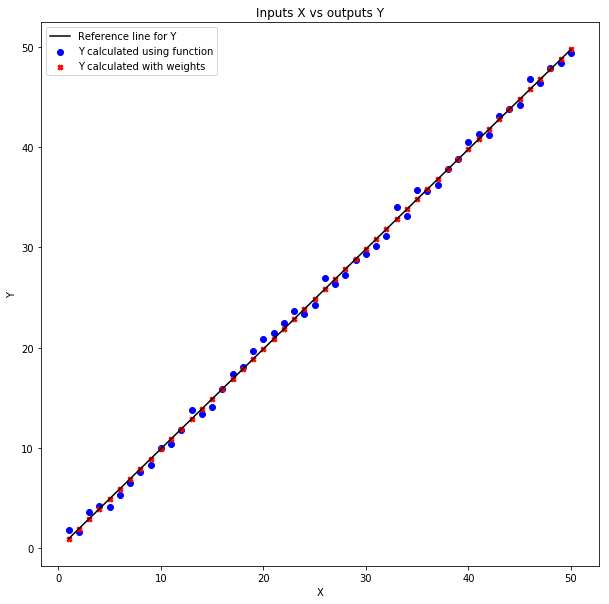

In [5]:
#Plotting the derived outputs and actual outputs vs inputs
plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(tempX, Y, c='B', label='Y calculated using function')
plt.scatter(tempX, derivedY, c='R', marker='X', s=25, label='Y calculated with weights')
plt.plot([tempX[0][0], tempX[0][49]], [derivedY[0][0], derivedY[0][49]], 'black', label='Reference line for Y')
plt.title("Inputs X vs outputs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

<b>Observations:</b>
<ul>
    <li>From the plot, it can be observed that the Y values calculated using the weights obtained do not coincide with the actual Y data points for all X values.</li>
    <li>However, it can be seen that the plotted line covers all the points generated using the weights.</li>
</ul>

<b>Recalculating using Gradient Descent</b>
<br>
\begin{equation*}
w = w + eta *  \sum_{k=1}^{50} (y_i-(w_0+w_1x_1))X_i
\end{equation*}
<br>
\begin{equation*}
where X_i = \begin{vmatrix} 1\\ x_i \end{vmatrix}
\end{equation*}

In [36]:
def getEnergyVal(X, Y, W):
    cost = Y - np.matmul(W.T, X)
    return np.sum(cost**2)

def gradientDescent(X, Y, W, eta, threshold = 0.00000001):
    epoch = 0
    oldEnergyVal = getEnergyVal(X, Y, W)
    while True:
        delta = np.matmul((Y - np.matmul(W.T, X)), X.T)
        W = W + (eta * np.matmul((Y - np.matmul(W.T, X)), X.T)).T
        newEnergyVal = getEnergyVal(X, Y, W)
        if abs(newEnergyVal - oldEnergyVal) < threshold:
            break
        oldEnergyVal = newEnergyVal
        epoch = epoch + 1
    return W, epoch
    
eta = 0.00001
W_ = np.array([0.0, 1.0]).reshape(2, 1)
gradientDescentW, epoch = gradientDescent(X, Y, W_, eta)
print("Final weights:\n", gradientDescentW)
print("#Epochs for convergence:", epoch)

Final weights:
 [[-0.06911061]
 [ 0.99683411]]
#Epochs for convergence: 30100


In [32]:
derivedY = np.matmul(gradientDescentW.T, X)

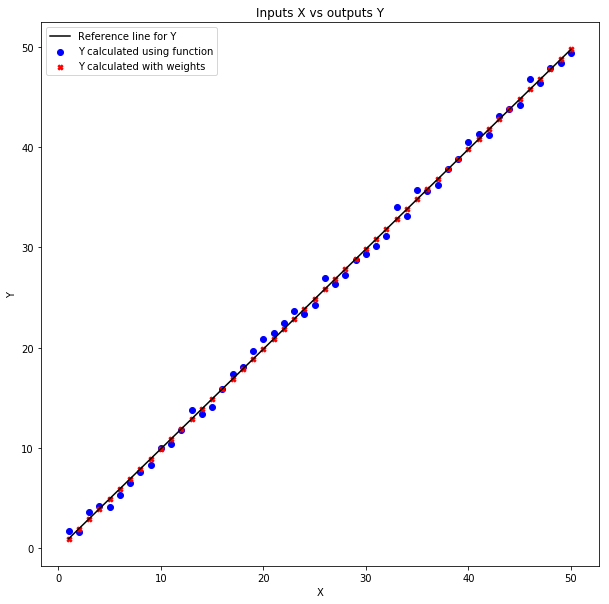

In [33]:
#Plotting the derived outputs and actual outputs vs inputs
plt.scatter(tempX, Y, c='B', label='Y calculated using function')
plt.scatter(tempX, derivedY, c='R', marker='X', s=25, label='Y calculated with weights')
plt.plot([tempX[0][0], tempX[0][49]], [derivedY[0][0], derivedY[0][49]], 'black', label='Reference line for Y')
plt.title("Inputs X vs outputs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

<b>Observations:</b>
<ul>
    <li>The Gradient Descent method converges to weights [-0.069, 0.996] after ~30000 epochs when starting with initial weights as [0.0, 0.1].</li>
    <li>The threshold is set to a very low value of 10^-8 to achieve the values.</li>
    <li>Compared to the pseudo-inverse method, this method provides a slightly different approximation value for the weights. Moreover, it takes more computation when compared to the pseudo-inverse method.</li>
    <li>However, on plotting the new Y values calculated with the new weights, it can be seen that the two graphs produce nearly similar results with slight deviations for the Gradient Descent method.</li>
    <li>Thus, it can be concluded that the weights obtained using the Gradient Descent method provide reasonably good approximations of the weights.</li>
</ul>